## ANALYSIS OF OZP RESULTS

In [1]:
import pandas as pd
import numpy as np

In [90]:
results_phi_en = pd.DataFrame(pd.read_csv('Results\EN-PHI3.csv'))
results_phi_ru = pd.DataFrame(pd.read_csv('Results\RU-PHI3.csv'))
results_gemma_en = pd.DataFrame(pd.read_csv('Results\EN-GEMMA.csv'))
results_gemma_ru = pd.DataFrame(pd.read_csv('Results\RU-GEMMA.csv'))
results_llama_en = pd.DataFrame(pd.read_csv('Results\EN-LLAMA3.csv'))
results_llama_ru = pd.DataFrame(pd.read_csv('Results\RU-LLAMA3.csv'))

complete_df = pd.concat([results_phi_en, results_phi_ru, results_gemma_en, results_gemma_ru, results_llama_en, results_llama_ru], axis=0).reset_index()
complete_df = complete_df.drop(labels=['index', 'Unnamed: 0'], axis = 1)

alldfs = {
    "PHI-EN": results_phi_en, 
    "PHI-RU": results_phi_ru, 
    "GEMMA-EN": results_gemma_en, 
    "GEMMA-RU": results_gemma_ru, 
    "LLAMA-EN": results_llama_en, 
    "LLAMA-RU": results_llama_ru
}

In [4]:
complete_df.columns

Index(['Language', 'Model', 'BeamSearch', 'Temperature', 'Category',
       'Input String', 'Original', 'Generated', 'TextID', 'BERTScore F1',
       'chrF++', 'Sentence BLEU', 'Corpus BLEU'],
      dtype='object')

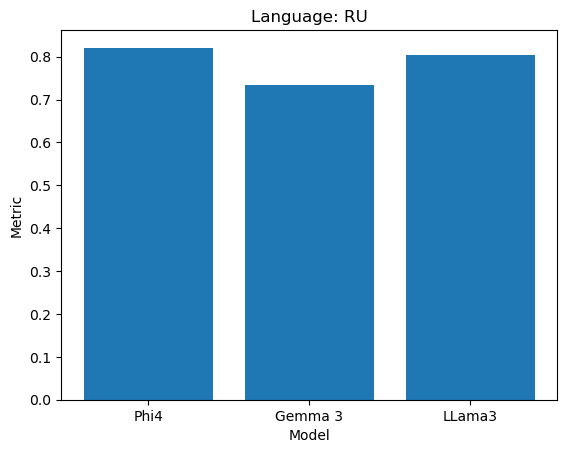

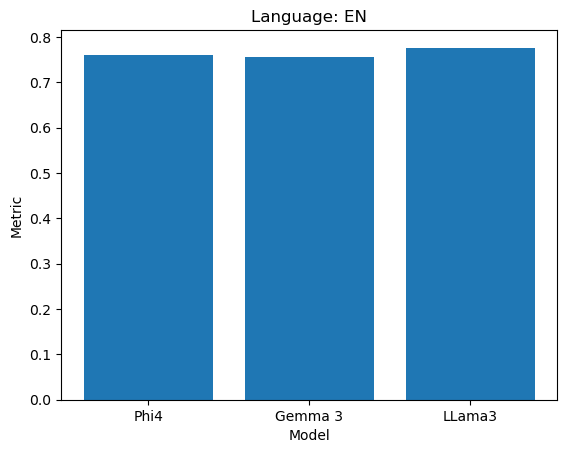

In [10]:
# Show BERTScore Per language per model.

for lang in ["RU", "EN"]:
    import matplotlib.pyplot as plt
    df = complete_df.loc[complete_df["Language"] == lang] 

    x = ["Phi4", "Gemma 3", "LLama3"]
    y = df.groupby("Model")["BERTScore F1"].mean()

    plt.bar(x, y)
    plt.title(f"Language: {lang}")
    plt.xlabel("Model")
    plt.ylabel("Metric")
    plt.show()


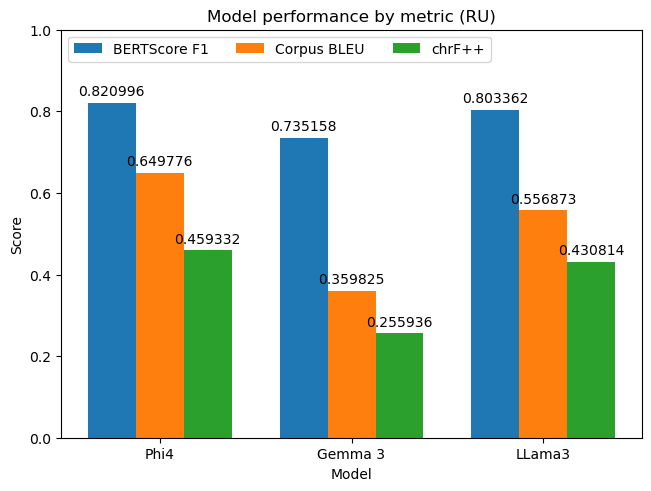

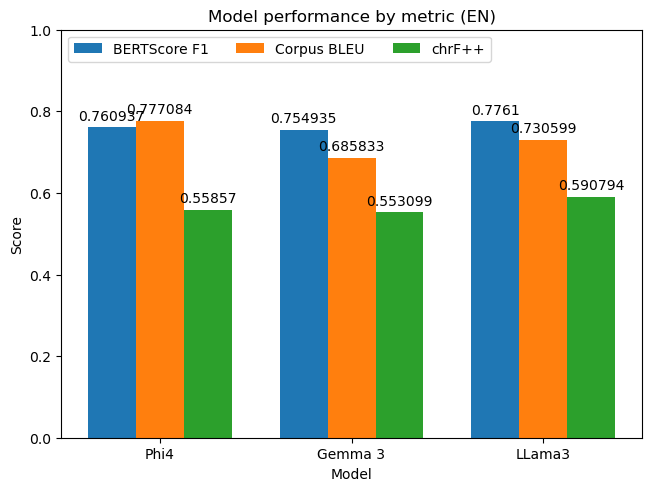

In [ ]:
# Show all scores per language per model
for lang in ["RU", "EN"]:
    import matplotlib.pyplot as plt
    df = complete_df.loc[complete_df["Language"] == lang] 

    models = ("Phi4", "Gemma 3", "LLama3")
    means = {
        'BERTScore F1': df.groupby("Model")["BERTScore F1"].mean(),
        'Corpus BLEU': df.groupby("Model")["Corpus BLEU"].mean(),
        'chrF++': df.groupby("Model")["chrF++"].mean(),
    }

    x = np.arange(len(models))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel('Score')
    ax.set_xlabel("Model")
    ax.set_title(f'Model performance by metric ({lang})')
    ax.set_xticks(x + width, models)
    ax.legend(loc='upper left', ncol = 3)
    ax.set_ylim(0, 1)

    plt.show()





C:\Users\danie\AppData\Local\Temp\ipykernel_25504\1542328128.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Parameter"] = param


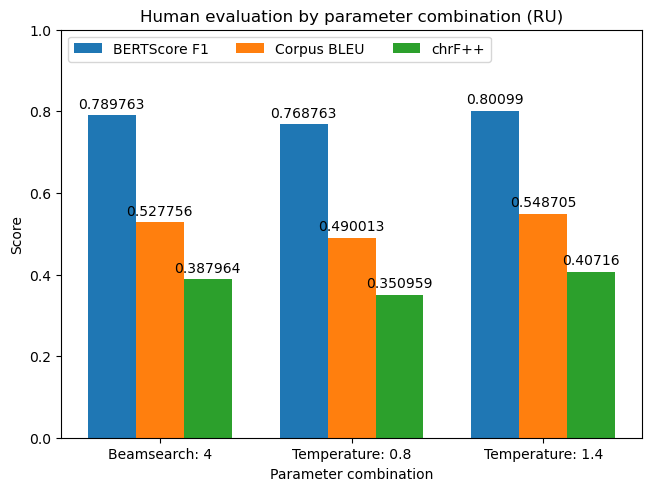

C:\Users\danie\AppData\Local\Temp\ipykernel_25504\1542328128.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Parameter"] = param


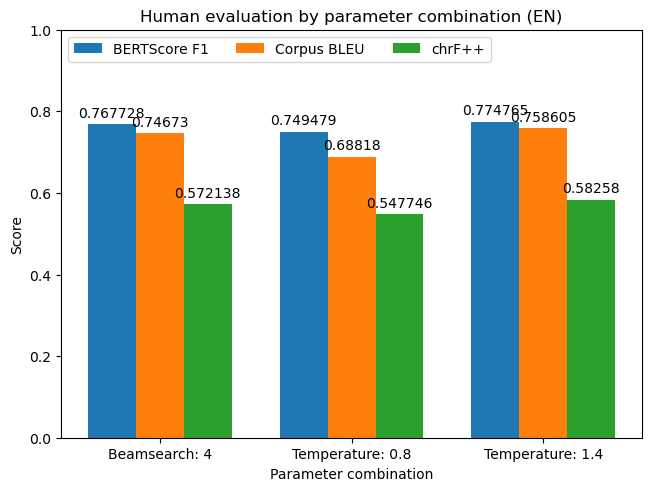

In [92]:
# Show all scores per language per model


for lang in ["RU", "EN"]:
    import matplotlib.pyplot as plt
    df = complete_df.loc[complete_df["Language"] == lang] 
    
    # creating aggregate column for parameters
    param = []
    for index, row in df.iterrows():
        if str(row["BeamSearch"]) == 'nan':

            param.append(row["Temperature"])
        else:
            param.append(row["BeamSearch"])

    df["Parameter"] = param

    parameter_combinations = ("Beamsearch: 4", "Temperature: 0.8", "Temperature: 1.4")
    means = {
        'BERTScore F1': df.groupby("Parameter")["BERTScore F1"].mean(),
        'Corpus BLEU': df.groupby("Parameter")["Corpus BLEU"].mean(),
        'chrF++': df.groupby("Parameter")["chrF++"].mean(),
    }

    x = np.arange(len(parameter_combinations))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel('Score')
    ax.set_xlabel("Parameter combination")
    ax.set_title(f'Human evaluation by parameter combination ({lang})')
    ax.set_xticks(x + width, parameter_combinations)
    ax.legend(loc='upper left', ncol = 3)
    ax.set_ylim(0, 1)

    plt.show()





In [96]:
complete_df["Category"].unique()

array(['SportsTeam', 'Astronaut', 'Airport', 'Athlete', 'City',
       'MusicalWork', 'Scientist', 'Monument', 'Artist', 'Company',
       'University', 'Politician', 'WrittenWork', 'Film', 'Food',
       'CelestialBody', 'ComicsCharacter', 'MeanOfTransportation',
       'Building'], dtype=object)

In [43]:

tdf = complete_df.loc[complete_df["Model"] == "Llama3"]
tdf["BERTScore F1"].value_counts()

1.000000    19
0.737292     3
0.799403     3
0.783565     3
0.852493     3
            ..
0.781409     1
0.940571     1
0.782344     1
0.782927     1
0.818308     1
Name: BERTScore F1, Length: 8010, dtype: int64

In [32]:
complete_df

,Language,Model,BeamSearch,Temperature,Category,Input String,Original,Generated,TextID,BERTScore F1,chrF++,Sentence BLEU,Corpus BLEU
0,EN,Phi4,4.0,NaN,SportsTeam,Estádio Municipal Coaracy da Mata Fonseca has ...,['Estádio Municipal Coaracy da Mata Fonseca is...,Estádio Municipal Coaracy da Mata Fonseca is l...,Id1,0.812556,0.667802,0.585486,0.782532
1,EN,Phi4,4.0,NaN,Astronaut,Nie Haisheng has birthDate 1964-10-13. Nie Hai...,"['Nie Haisheng, born on October 13, 1964, work...","Nie Haisheng was born on October 13, 1964, and...",Id2,0.856198,0.713093,0.928610,NaN
2,EN,Phi4,4.0,NaN,Airport,MotorSport Vision has city Fawkham.,['MotorSport Vision is located in the city of ...,MotorSport Vision is located in Fawkham.,Id3,0.905299,0.793287,1.000000,NaN
3,EN,Phi4,4.0,NaN,Athlete,Aleksandr Prudnikov has height 185.0 (centimet...,['185 centimetre tall Aleksandr Prudnikov play...,Aleksandr Prudnikov has a height of 185.0 cent...,Id4,0.767154,0.513698,0.552915,NaN
4,EN,Phi4,4.0,NaN,City,Ciudad Ayala has populationMetro 1777539. Ciud...,['Ciudad Ayala is a city with population densi...,"Ciudad Ayala is a city with a population of 1,...",Id5,0.754495,0.597208,0.691623,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25924,RU,Llama3,NaN,1.4,CelestialBody,(19255) 1994 VK8 имеет epoch 2006-12-31. (1925...,['Эпоха (19255) 1994 VK8 - 31 декабря 2006 год...,Астероид (19255) 1994 VK8 обнаружен 3 ноября 1...,Id1098,0.697072,0.231273,0.206931,NaN
25925,RU,Llama3,NaN,1.4,SportsTeam,Лумеццане (футбольный клуб) имеет manager Мише...,"['Итальянец Мишель Марколини играет за ФК ""Кье...",Мишель Марколини - итальянский футбольный тренер.,Id1099,0.704471,0.179182,0.136752,NaN
25926,RU,Llama3,NaN,1.4,Astronaut,"Олдрин, Базз имеет selectedByNasa 1963 год.","['НАСА отобрало Базза Олдрина в 1963 году.', '...",Принадлежность НАСА: Х,Id1100,0.620137,0.105903,0.146933,NaN
25927,RU,Llama3,NaN,1.4,CelestialBody,1097 Виция имеет epoch 2006-12-31. 1097 Виция ...,['Эпоха 1097 Виции - 31.12.2006. Космическая с...,Виция имеет эпоху 2006-12-31. Виция имеет эска...,Id1101,0.766215,0.397126,0.578692,NaN


# Sampling for human evaluation

In [47]:
phi_dfs = {
    "PHI-EN": results_phi_en, 
    "PHI-RU": results_phi_ru
}

for name, df in phi_dfs.items():

    beam_rows = df.loc[df["BeamSearch"] == 4.0]
    temp_08_rows = df.loc[df["Temperature"] == 0.8]
    temp_14_rows = df.loc[df["Temperature"] == 1.4]

    beam_sample = beam_rows.sample(10, random_state = 18)
    temp_08_sample = temp_08_rows.sample(10, random_state = 19)
    temp_14_sample = temp_14_rows.sample(10, random_state = 20)

    sample  = pd.concat([beam_sample, temp_08_sample, temp_14_sample], axis=0)
    sample = sample.reset_index()

    filename = f"{name}_SAMPLE_3.csv"
    sample.to_csv(filename, index = True)

    

In [30]:

datasample = pd.DataFrame(pd.read_csv('Results\PHI-EN_SAMPLE.csv'))

for i in range(len(datasample)):
    print(datasample.loc[i]["Generated"])
    print()
    generated = datasample.loc[i]["Original"].split("', '")
    generated[0] = generated[0][2:]
    generated[-1] = generated[-1][:-2]

    gentext = ""
    for line in generated:
        gentext += line
        gentext += '\n'
    
    print(gentext)
    print()
    

Bedford Aerodrome, operated by MotorSport Vision, has the ICAO Location Identifier EGBF and is situated at an elevation of 83.2104 feet above sea level. The aerodrome features a runway named 08/26, which is made of concrete.

MotorSport Vision is the operating organisation for Bedford Aerodrome which has a runway surface made out of concrete. Bedford Aerodrome's International Civil Aviation Organization (ICAO) identifier is EGBF and it is 83.2104 above sea level. The aerodrome has a runway called 08/26.", 'The Bedford Aerodrome, operated by the MotorSport Vision, is located 83.2 meters above sea level at ICAO location identifier EGBF. It has a concrete runway named "08/26".
MotorSport Vision operates the Bedford Aerodrome, whose ICAO location identifier is EGBF. It is also known for a runway called 08/26, and it has a runway surface made of concrete with the elevation above sea level of 82.2104.


Mexico has currency Mexican peso. Mexico has demonym Mexicans. Bionico has course Dessert

# Augmenting sample files with human evaluation results

In [78]:
# ADDING RESULTS INTO SAMPLE FILES

results = pd.DataFrame(pd.read_csv('Results/Samples/human_evaluation_results/OZP-PHI-RU-3.csv'))
og_df = pd.DataFrame(pd.read_csv('Results/Samples/PHI-RU_SAMPLE_3_DONE.csv'))

results = results.drop(labels = ['StartDate',
'EndDate',
'Status',
'IPAddress',
'Progress',
'Duration (in seconds)',
'Finished',
'RecordedDate',
'ResponseId',
'RecipientLastName',
'RecipientFirstName',
'RecipientEmail',
'ExternalReference',
'LocationLatitude',
'LocationLongitude',
'DistributionChannel',
'UserLanguage',
'Q37'
], axis=1)

og_df = og_df.drop(labels = ['Unnamed: 0.1',
'index',
'Unnamed: 0'
], axis=1)

results = results.iloc[2:]


correctness = [] # 1
readability = [] # 2
hallucination = [] # 3


for col in results.columns:

    if col[-1] == '1':

        list = results[col].tolist()
        list = [float(x) for x in list]
        list = [i for i in list if str(i) != 'nan']
        list = [i / 10 for i in list]

        try:
            avg = sum(list) / len(list)
        except:
            avg = 0
        correctness.append(avg)
            
    if col[-1] == '2':

        list = results[col].tolist()
        list = [float(x) for x in list]
        list = [i for i in list if str(i) != 'nan']
        list = [i / 10 for i in list]
        try:
            avg = sum(list) / len(list)
        except:
            avg = 0
        readability.append(avg)

    if col[-1] == '3':

        list = results[col].tolist()
        list = [float(x) for x in list]
        list = [i for i in list if str(i) != 'nan']
        list = [i / 10 for i in list]
        try:
            avg = sum(list) / len(list)
        except:
            avg = 0
        hallucination.append(avg)


og_df["Mean correctness"] = correctness
og_df["Mean readability"] = readability
og_df["Mean hallucination"] = hallucination


In [79]:
og_df.to_csv('Results/Samples/augmented_samples/RU-3.csv', index = True)

In [70]:
og_df

,Language,Model,BeamSearch,Temperature,Category,Input String,Original,Generated,TextID,BERTScore F1,chrF++,Sentence BLEU,Corpus BLEU,Mean correctness,Mean readability,Mean hallucination
0,EN,Phi4,4.0,NaN,Artist,Aaron Turner has genre Post-metal. Aaron Turne...,['Aaron Turner is a singer who was born in Bos...,Aaron Turner is a Post-metal artist from Bosto...,Id1740,0.749017,0.480790,0.728291,NaN,0.85,1.00,0.00
1,EN,Phi4,4.0,NaN,MusicalWork,Mermaid (Train song) has genre Reggae. Mermaid...,['Produced by the Espionage production team an...,"""Mermaid (Train song)"" is a Reggae genre song....",Id610,0.623303,0.420826,0.570326,NaN,0.95,0.45,0.40
2,EN,Phi4,4.0,NaN,Scientist,Brandon Carter has birthDate 1942-01-01. Brand...,"['Brandon Carter, who was born on January 1st,...","Brandon Carter was born on January 1, 1942, an...",Id1339,0.825882,0.710915,0.965032,NaN,1.00,1.00,0.00
3,EN,Phi4,4.0,NaN,MusicalWork,Bootleg Series Volume 1: The Quine Tapes has p...,"['The rock album ""Bootleg Series Volume 1: The...",Bootleg Series Volume 1: The Quine Tapes has p...,Id636,0.697848,0.563184,0.668361,NaN,1.00,0.50,0.05
4,EN,Phi4,4.0,NaN,Monument,11th Mississippi Infantry Monument has establi...,['The 11th Mississippi Infantry Monument is no...,"The 11th Mississippi Infantry Monument, establ...",Id736,0.762383,0.619511,0.811389,NaN,0.95,0.75,0.05
5,EN,Phi4,4.0,NaN,Food,Mexico has currency Mexican peso. Mexico has d...,['Bionico (a dish served for dessert) is a foo...,Mexico has currency Mexican peso. Mexico has d...,Id753,0.587295,0.381747,0.579199,NaN,0.90,0.25,0.15
6,EN,Phi4,4.0,NaN,Food,Bionico has dishVariation Honey. Bionico has c...,"['Honey can be added to bionico, which is a fo...",Bionico has a dish variation called Honey from...,Id567,0.695010,0.336866,0.602248,NaN,0.80,0.40,0.30
7,EN,Phi4,4.0,NaN,Film,Death on a Factory Farm has director Tom Simon...,['Death on a Factory Farm is a HBO film produc...,Death on a Factory Farm is directed by Tom Sim...,Id136,0.756480,0.588831,0.737576,NaN,1.00,0.90,0.05
8,EN,Phi4,4.0,NaN,MeanOfTransportation,Detroit has isPartOf Michigan.,"['Detroit is part of Michigan.', 'The city of ...",Detroit is part of Michigan.,Id534,0.873366,0.723911,1.000000,NaN,0.95,0.95,0.00
9,EN,Phi4,4.0,NaN,Film,Death on a Factory Farm has musicComposer Jami...,['A person named Jamie Lawrence is a member of...,Death on a Factory Farm has musicComposer Jami...,Id273,0.676254,0.481311,0.713748,NaN,0.80,0.40,0.25


# ANALYSIS of human evaluation results


In [80]:
# Creating combination file of all augmented samples

# EN

en_complete_augmented_df = pd.DataFrame()
en_augmented_dfs = [
    'Results/Samples/augmented_samples/EN-1.csv',
    'Results/Samples/augmented_samples/EN-2.csv'
]

for en_augmented_df in en_augmented_dfs:
    en_augmented_df = pd.DataFrame(pd.read_csv(en_augmented_df))

    en_complete_augmented_df = pd.concat([en_complete_augmented_df, en_augmented_df], axis=0)

en_complete_augmented_df = en_complete_augmented_df.reset_index()
en_complete_augmented_df = en_complete_augmented_df.drop(labels=['index', 'Unnamed: 0'], axis = 1)

In [81]:
# Creating combination file of all augmented samples

# RU

ru_complete_augmented_df = pd.DataFrame()
ru_augmented_dfs = [
    'Results/Samples/augmented_samples/RU-1.csv',
    'Results/Samples/augmented_samples/RU-2.csv',
    'Results/Samples/augmented_samples/RU-3.csv'
]

for ru_augmented_df in ru_augmented_dfs:
    ru_augmented_df = pd.DataFrame(pd.read_csv(ru_augmented_df))

    ru_complete_augmented_df = pd.concat([ru_complete_augmented_df, ru_augmented_df], axis=0)

ru_complete_augmented_df = ru_complete_augmented_df.reset_index()
ru_complete_augmented_df = ru_complete_augmented_df.drop(labels=['index', 'Unnamed: 0'], axis = 1)

In [82]:
ru_complete_augmented_df

,Language,Model,BeamSearch,Temperature,Category,Input String,Original,Generated,TextID,BERTScore F1,chrF++,Sentence BLEU,Corpus BLEU,Mean correctness,Mean readability,Mean hallucination
0,EN,Phi4,4.0,NaN,Airport,Bedford Aerodrome has operatingOrganisation Mo...,"[""MotorSport Vision is the operating organisat...","Bedford Aerodrome, operated by MotorSport Visi...",Id1527,0.799706,0.525530,0.868165,NaN,0.833333,0.866667,0.30
1,EN,Phi4,4.0,NaN,Food,Mexico has currency Mexican peso. Mexico has d...,"['Bionico, a dessert found in Mexico along wit...",Mexico has currency Mexican peso. Mexico has d...,Id1318,0.686626,0.381340,0.663830,NaN,0.950000,0.550000,0.00
2,EN,Phi4,4.0,NaN,Airport,Bedford Aerodrome has operatingOrganisation Mo...,['The Bedford Aerodrome has an operating organ...,Bedford Aerodrome is operated by MotorSport Vi...,Id935,0.749314,0.555735,0.878905,NaN,1.000000,1.000000,0.00
3,EN,Phi4,4.0,NaN,Astronaut,Zaoyang has isPartOf Xiangyang.,"['Zaoyang is part of Xiangyang.', 'Zaoyang is ...",Zaoyang is part of Xiangyang.,Id1066,0.938917,0.846065,1.000000,NaN,1.000000,1.000000,0.00
4,EN,Phi4,4.0,NaN,Scientist,India has demonym Indian.,['Indian is the demonym for people from India....,The people from India are called Indians.,Id620,0.658790,0.373170,0.659730,NaN,1.000000,1.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,RU,Phi4,NaN,1.4,Airport,Схипхол имеет 1stRunwayLengthMetre 3800. Схипх...,['Амстердамский аэропорт Схипхол находится на ...,Схипхол имеет первый взлетно-посадочная взлетн...,Id419,0.797305,0.373666,0.559832,NaN,0.833333,0.600000,0.55
86,RU,Phi4,NaN,1.4,Astronaut,Медаль «За выдающуюся службу» (ВМС США) имеет ...,['Алан Шепард родился в Нью-Гэмпшире (США) и у...,"Медаль ""За выдающуюся службу"" (ВМС США) превос...",Id820,0.815111,0.496964,0.522392,NaN,0.966667,0.733333,0.00
87,RU,Phi4,NaN,1.4,University,Технологический институт Ачарья имеет director...,['Технологический институт Ачарья (директор - ...,Technological Institute Acharya обладает декан...,Id268,0.681121,0.193418,0.249339,NaN,0.900000,0.600000,0.10
88,RU,Phi4,NaN,1.4,Astronaut,Эллиот Си имеет almaMater Техасский университе...,['Эллиот Си родился в Далласе и учился в Униве...,Эллиот Си учился в Техасском университете в Ос...,Id309,0.854211,0.567068,0.645953,NaN,0.800000,0.733333,0.60


In [83]:
for i, j in [(ru_augmented_df, "RU"), (en_augmented_df, "EN")]:
    print(j)
    print(i.loc[:, 'Mean hallucination'].mean())

RU
0.19999999999999993
EN
0.18666666666666665


In [107]:
diff_bert = []
diff_bleu = []
diff_chrf = []

for index, row in ru_augmented_df.iterrows():
    diff_bert.append(abs(row["Mean correctness"] - row["BERTScore F1"]))
    diff_bleu.append(abs(row["Mean correctness"] - row["Sentence BLEU"]))
    diff_chrf.append(abs(row["Mean correctness"] - row["chrF++"]))

print(sum(diff_bert) / len(diff_bert))
print(sum(diff_bleu) / len(diff_bleu))
print(sum(diff_chrf) / len(diff_chrf))

0.13736627009179855
0.3082459131797695
0.454551087750329


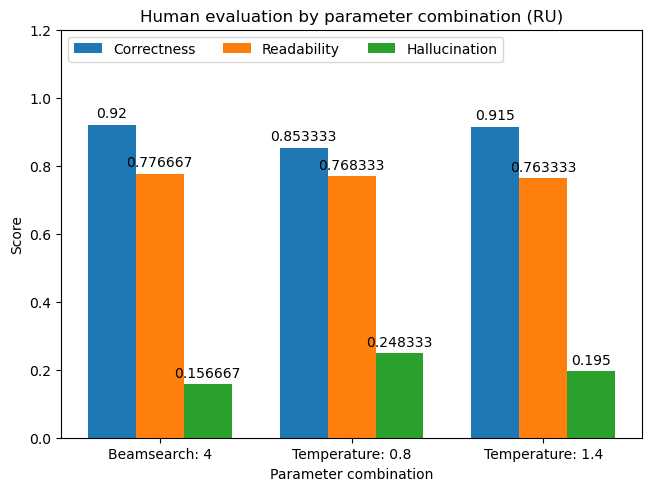

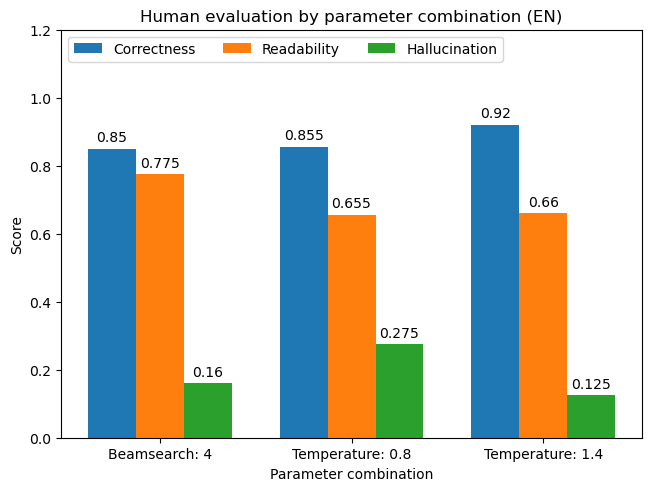

In [88]:
# Show all scores per language per model


for lang, augmented_df in [("RU", ru_augmented_df), ("EN", en_augmented_df)]:
    import matplotlib.pyplot as plt

    df = augmented_df.copy()
    
    # creating aggregate column for parameters
    param = []
    for index, row in df.iterrows():
        if str(row["BeamSearch"]) == 'nan':

            param.append(row["Temperature"])
        else:
            param.append(row["BeamSearch"])

    df["Parameter"] = param

    parameter_combinations = ("Beamsearch: 4", "Temperature: 0.8", "Temperature: 1.4")
    means = {
        'Correctness': df.groupby("Parameter")["Mean correctness"].mean(),
        'Readability': df.groupby("Parameter")["Mean readability"].mean(),
        'Hallucination': df.groupby("Parameter")["Mean hallucination"].mean(),
    }

    x = np.arange(len(parameter_combinations))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel('Score')
    ax.set_xlabel("Parameter combination")
    ax.set_title(f'Human evaluation by parameter combination ({lang})')
    ax.set_xticks(x + width, parameter_combinations)
    ax.legend(loc='upper left', ncol = 3)
    ax.set_ylim(0, 1.2)

    plt.show()





In [108]:
ru_complete_augmented_df

,Language,Model,BeamSearch,Temperature,Category,Input String,Original,Generated,TextID,BERTScore F1,chrF++,Sentence BLEU,Corpus BLEU,Mean correctness,Mean readability,Mean hallucination
0,EN,Phi4,4.0,NaN,Airport,Bedford Aerodrome has operatingOrganisation Mo...,"[""MotorSport Vision is the operating organisat...","Bedford Aerodrome, operated by MotorSport Visi...",Id1527,0.799706,0.525530,0.868165,NaN,0.833333,0.866667,0.30
1,EN,Phi4,4.0,NaN,Food,Mexico has currency Mexican peso. Mexico has d...,"['Bionico, a dessert found in Mexico along wit...",Mexico has currency Mexican peso. Mexico has d...,Id1318,0.686626,0.381340,0.663830,NaN,0.950000,0.550000,0.00
2,EN,Phi4,4.0,NaN,Airport,Bedford Aerodrome has operatingOrganisation Mo...,['The Bedford Aerodrome has an operating organ...,Bedford Aerodrome is operated by MotorSport Vi...,Id935,0.749314,0.555735,0.878905,NaN,1.000000,1.000000,0.00
3,EN,Phi4,4.0,NaN,Astronaut,Zaoyang has isPartOf Xiangyang.,"['Zaoyang is part of Xiangyang.', 'Zaoyang is ...",Zaoyang is part of Xiangyang.,Id1066,0.938917,0.846065,1.000000,NaN,1.000000,1.000000,0.00
4,EN,Phi4,4.0,NaN,Scientist,India has demonym Indian.,['Indian is the demonym for people from India....,The people from India are called Indians.,Id620,0.658790,0.373170,0.659730,NaN,1.000000,1.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,RU,Phi4,NaN,1.4,Airport,Схипхол имеет 1stRunwayLengthMetre 3800. Схипх...,['Амстердамский аэропорт Схипхол находится на ...,Схипхол имеет первый взлетно-посадочная взлетн...,Id419,0.797305,0.373666,0.559832,NaN,0.833333,0.600000,0.55
86,RU,Phi4,NaN,1.4,Astronaut,Медаль «За выдающуюся службу» (ВМС США) имеет ...,['Алан Шепард родился в Нью-Гэмпшире (США) и у...,"Медаль ""За выдающуюся службу"" (ВМС США) превос...",Id820,0.815111,0.496964,0.522392,NaN,0.966667,0.733333,0.00
87,RU,Phi4,NaN,1.4,University,Технологический институт Ачарья имеет director...,['Технологический институт Ачарья (директор - ...,Technological Institute Acharya обладает декан...,Id268,0.681121,0.193418,0.249339,NaN,0.900000,0.600000,0.10
88,RU,Phi4,NaN,1.4,Astronaut,Эллиот Си имеет almaMater Техасский университе...,['Эллиот Си родился в Далласе и учился в Униве...,Эллиот Си учился в Техасском университете в Ос...,Id309,0.854211,0.567068,0.645953,NaN,0.800000,0.733333,0.60


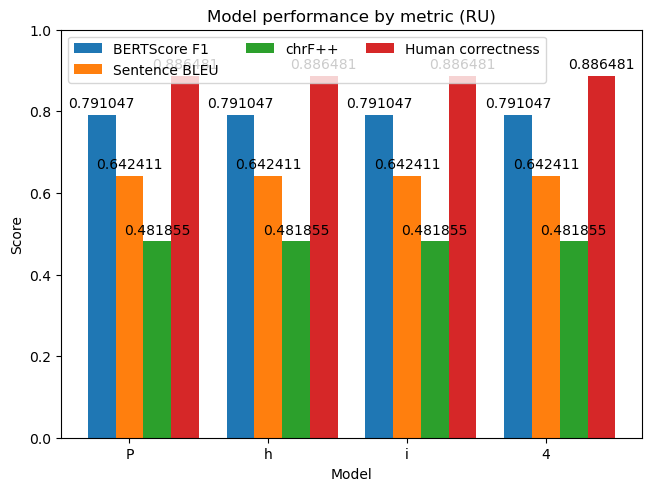

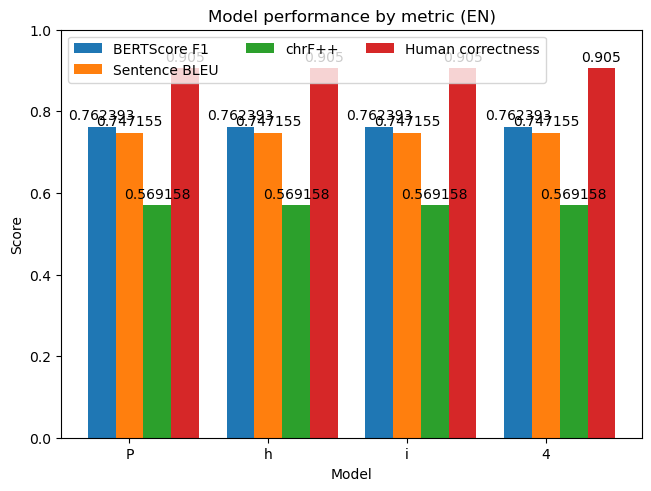

In [115]:
# Show all scores per language per model
for lang, df in [("RU", ru_complete_augmented_df), ("EN", en_complete_augmented_df)]:
    import matplotlib.pyplot as plt

    models = ("Phi4")
    means = {
        'BERTScore F1': df["BERTScore F1"].mean(),
        'Sentence BLEU': df["Sentence BLEU"].mean(),
        'chrF++': df["chrF++"].mean(),
        'Human correctness': df["Mean correctness"].mean(),
    }

    x = np.arange(len(models))  # the label locations
    width = 0.2  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained')

    for attribute, measurement in means.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, measurement, width, label=attribute)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    ax.set_ylabel('Score')
    ax.set_xlabel("Model")
    ax.set_title(f'Model performance by metric ({lang})')
    ax.set_xticks(x + width, models)
    ax.legend(loc='upper left', ncol = 3)
    ax.set_ylim(0, 1)

    plt.show()



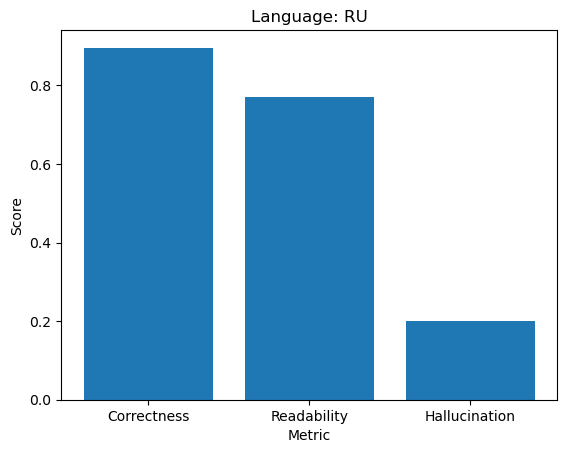

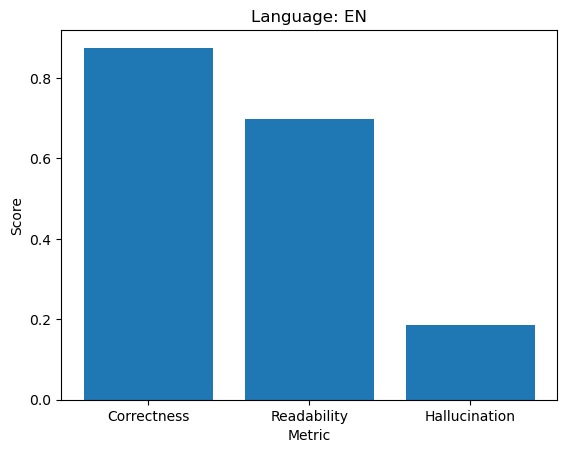

In [86]:
# Show Hallucination per language per model.

for lang, df in [("RU", ru_augmented_df), ("EN", en_augmented_df)]:
    import matplotlib.pyplot as plt

    x = ["Correctness", "Readability", "Hallucination"]
    y = [df.loc[:, 'Mean correctness'].mean(), df.loc[:, 'Mean readability'].mean(), df.loc[:, 'Mean hallucination'].mean()]

    plt.bar(x, y)
    plt.title(f"Language: {lang}")
    plt.xlabel("Metric")
    plt.ylabel("Score")
    plt.show()
